<a href="https://www.kaggle.com/code/vaibhavcd/tomato-diesease-inceptionv3?scriptVersionId=138331029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'


In [3]:

# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [6]:
# our layers 
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:

training_set = train_datagen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [12]:
test_set = test_datagen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [13]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 366s 619ms/step - loss: 2.9232 - accuracy: 0.6808 - val_loss: 2.9669 - val_accuracy: 0.7088
Epoch 2/10
574/574 [==============================] - 226s 393ms/step - loss: 2.0751 - accuracy: 0.7942 - val_loss: 2.4802 - val_accuracy: 0.7775
Epoch 3/10
574/574 [==============================] - 226s 394ms/step - loss: 1.9661 - accuracy: 0.8224 - val_loss: 2.2457 - val_accuracy: 0.8061
Epoch 4/10
574/574 [==============================] - 226s 394ms/step - loss: 1.9668 - accuracy: 0.8427 - val_loss: 2.3870 - val_accuracy: 0.8181
Epoch 5/10
574/574 [==============================] - 225s 392ms/step - loss: 1.9754 - accuracy: 0.8489 - val_loss: 2.2362 - val_accuracy: 0.8504
Epoch 6/10
574/574 [==============================] - 228s 396ms/step - loss: 1.7575 - accuracy: 0.8671 - val_loss: 1.8383 - val_accuracy: 0.8615
Epoch 7/10
574/574 [==============================] - 225s 392ms/step - loss: 1.8093 - accuracy: 0.8694 - val_loss: 1.9425 -

In [14]:
import matplotlib.pyplot as plt

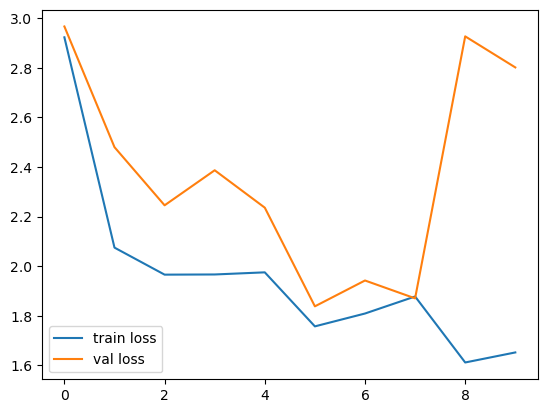

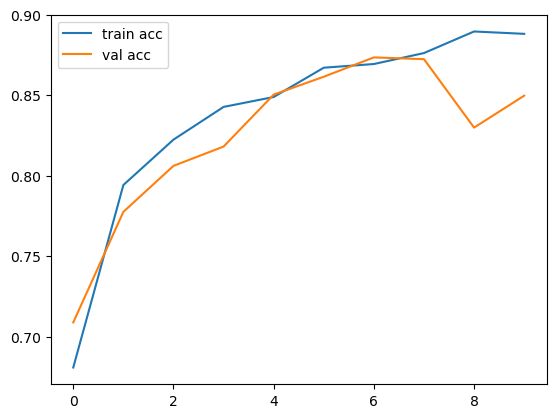

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')